# pandas的stack和pivot实现数据透视
<font size="5" color="#dd0000">**将劣势数据变成二位交叉形式, 便于分析, 叫做重塑或透视**</font>
<img src="./image/stack_pivot.png">

1. 经过统计的到多为指标数据
2. 使用unstack实现数据二维透视
3. 使用pivot简化透视
4. stack、unstack、pivot的语法

**1.经过统计得到多为度指标数据**
非常场景的统计场景, 指定多个维度, 计算聚合后的指标
示例: 统计的到点光源评分数据集, 每个月份的每个分数被评多份多少次(月份、分数1~5、次数)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('./data/movies/ratings.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# pandas处理日期
df['pddate'] = pd.to_datetime(df['timestamp'], unit='s')

In [5]:
df.head()

,userId,movieId,rating,timestamp,pddate
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [6]:
df.dtypes

userId                int64
movieId               int64
rating              float64
timestamp             int64
pddate       datetime64[ns]
dtype: object

**注意: 使用pd.to_datetime()函数所转换的时间戳可以直接使用pandas中的日期函数, 列如:**
1. dt.month
2. dt.day

In [7]:
df['pddate'].dt.month

0         7
1         7
2         7
3         7
4         7
         ..
100831    5
100832    5
100833    5
100834    5
100835    5
Name: pddate, Length: 100836, dtype: int32

In [8]:
# 实现数据统计
df_group = df.groupby([df['pddate'].dt.month, 'rating'])

In [9]:
df_group

In [10]:
# 取分组数据
df_group.get_group((4, 0.5))

,userId,movieId,rating,timestamp,pddate
1024,7,49286,0.5,1176181731,2007-04-10 05:08:51
9996,66,255,0.5,1113188840,2005-04-11 03:07:20
10093,66,1326,0.5,1113189117,2005-04-11 03:11:57
10793,68,2699,0.5,1240092517,2009-04-18 22:08:37
11426,68,60363,0.5,1240092818,2009-04-18 22:13:38
...,...,...,...,...,...
80148,503,54286,0.5,1335219507,2012-04-23 22:18:27
80160,503,93270,0.5,1335220004,2012-04-23 22:26:44
80166,503,94015,0.5,1335232826,2012-04-24 02:00:26
81640,517,1302,0.5,1492339379,2017-04-16 10:42:59


In [11]:
df_group = df_group['userId'].agg(pv=np.size)

In [12]:
df_group.head(20)

pv
pddate rating      
1      0.5      154
       1.0      257
       1.5      157
       2.0      542
       2.5      376
       3.0     1704
       3.5     1315
       4.0     2407
       4.5      739
       5.0     1033
2      0.5      142
       1.0      199
       1.5      246
       2.0      603
       2.5      643
       3.0     1367
       3.5     1326
       4.0     1821
       4.5      652
       5.0      636

这样的数据格式, 想查看按月份, 不同评分次数趋势, 没办法实现
需要将数据变成每个评分是一列才可以实现

**2.使用unstack实现数据二维透视**
目的: 想要画图对比安装月份的不同评分的数量趋势

In [13]:
df_stack = df_group.unstack()
df_stack

pv                                                  
rating  0.5  1.0  1.5   2.0  2.5   3.0   3.5   4.0  4.5   5.0
pddate                                                       
1       154  257  157   542  376  1704  1315  2407  739  1033
2       142  199  246   603  643  1367  1326  1821  652   636
3       201  307  214   693  542  1492  1150  2289  803  1189
4        83  153   94   576  335  1509   932  1996  843  1206
5       261  276  232   696  690  2247  1506  2726  960  1289
6        73  158  224   692  874  1989  1124  1968  661  1062
7        42  177   77   442  302  1313   845  2032  559  1161
8        97  412  166  1067  401  2161   789  2240  551  1190
9        72  145  128   538  447  1462  1278  2510  962   968
10       49  307   55   621  196  1607   781  1993  518  1021
11      135  207  119   506  430  1788  1211  2949  844  1487
12       61  213   79   575  314  1408   879  1887  459   969

In [14]:
# 查看某一个pv的数据
df_stack[('pv', 1.0)]

pddate
1     257
2     199
3     307
4     153
5     276
6     158
7     177
8     412
9     145
10    307
11    207
12    213
Name: (pv, 1.0), dtype: int64

In [15]:
# 查看指定月份和指定pv数据
df_stack.loc[1, ('pv', 2.0)]

542

<Axes: xlabel='pddate'>

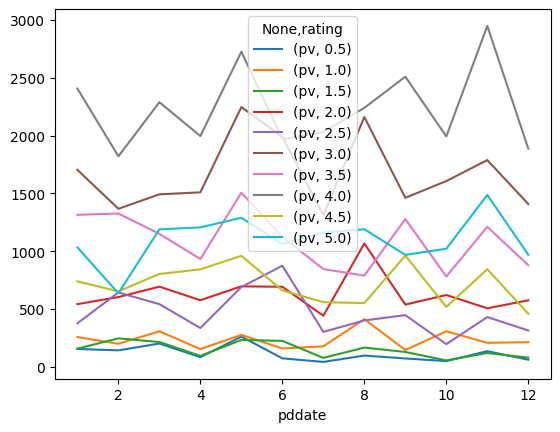

In [16]:
df_stack.plot()

In [17]:
#unstack和stack互逆操作
df_stack.stack().head(20)

pv
pddate rating      
1      0.5      154
       1.0      257
       1.5      157
       2.0      542
       2.5      376
       3.0     1704
       3.5     1315
       4.0     2407
       4.5      739
       5.0     1033
2      0.5      142
       1.0      199
       1.5      246
       2.0      603
       2.5      643
       3.0     1367
       3.5     1326
       4.0     1821
       4.5      652
       5.0      636

## 3.使用pivot简化透视

In [18]:
df_group.head(20)

pv
pddate rating      
1      0.5      154
       1.0      257
       1.5      157
       2.0      542
       2.5      376
       3.0     1704
       3.5     1315
       4.0     2407
       4.5      739
       5.0     1033
2      0.5      142
       1.0      199
       1.5      246
       2.0      603
       2.5      643
       3.0     1367
       3.5     1326
       4.0     1821
       4.5      652
       5.0      636

In [19]:
df_reset = df_group.reset_index()
df_reset.head()

,pddate,rating,pv
0,1,0.5,154
1,1,1.0,257
2,1,1.5,157
3,1,2.0,542
4,1,2.5,376


In [22]:
df_pivot = df_reset.pivot(index='pddate', columns='rating', values='pv')

In [24]:
df_pivot.head()

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
pddate,,,,,,,,,,
1,154,257,157,542,376,1704,1315,2407,739,1033
2,142,199,246,603,643,1367,1326,1821,652,636
3,201,307,214,693,542,1492,1150,2289,803,1189
4,83,153,94,576,335,1509,932,1996,843,1206
5,261,276,232,696,690,2247,1506,2726,960,1289


<Axes: xlabel='pddate'>

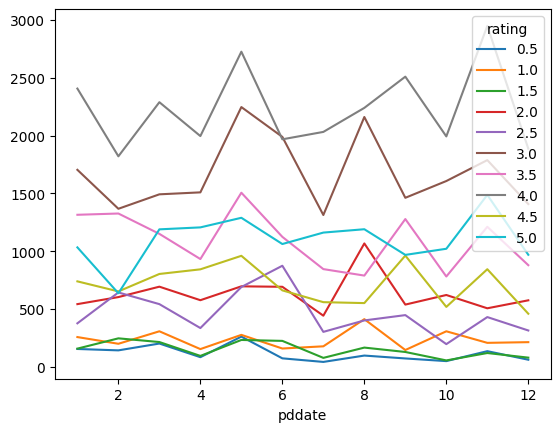

In [26]:
df_pivot.plot()

**pivot方法相当于对DataFrame使用set_index创建分层索引, 然后调用unstack**


## 4. stack、unstack、pivot的语法

**stack:DataFrame.stack(level=-1, dropna=True), 将column变成index, 类似把横放的书记变成竖放**
level=-1代表多层索引的最内层, 可以通过level=0,1,2指定多层索引的对应层

<img src="./image/stack.png">

**unstack:DataFrame.unstack(level=-1, fill_value=None), 将index变成column, 类似把竖放的书变为横放**
<img src="./image/unstack.png">

**pivot:DataFrame.pivot(index=None, columns=None, values=None), 指定index, columns, values实现二维透视**
<img src="./image/pivot.png">